In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatch
from matplotlib.lines import Line2D
from openpyxl.chart import (PieChart3D, Reference)
from matplotlib.patches import Ellipse, Circle
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("city_data.csv")
ride_data_to_load = pd.read_csv("ride_data.csv")

In [9]:
# Read the City Data
city_data_to_load.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [10]:
# Read the Ride Data
ride_data_to_load.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [11]:
city_data_to_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
city            120 non-null object
driver_count    120 non-null int64
type            120 non-null object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [12]:
ride_data_to_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [13]:
#combine the two data sets into one: city_data_to_load & ride_data_to_load
ride_data_to_load.join(city_data_to_load.set_index('city'), on = 'city')
combine_data_df = ride_data_to_load.merge(city_data_to_load, on="city", how="outer")
# colors to use (Gold, SkyBlue, and Coral)
combine_data_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [14]:
# Obtain the x and y coordinates for each of the three city types
#count of rides in city
ct_city_rides = combine_data_df.groupby(['city'])['city'].count()
rides_avg = combine_data_df.groupby(['city'])['fare'].mean()
city_type = combine_data_df.groupby(['city'])['type'].max()
driver_ct = combine_data_df.groupby(['city'])['driver_count'].max()

In [15]:
#dataFrame above data
bubble_df = pd.DataFrame({"TotalRides": (ct_city_rides), "AvgFare": (rides_avg), "DriverCt": (driver_ct), "CityType": (city_type)})

In [16]:
def get_color(bubble_df):
    if bubble_df['CityType'] == "Urban":
        return "Coral"
    elif bubble_df['CityType'] == "Suburban":
        return "SkyBlue"
    elif bubble_df['CityType'] == "Rural":
        return "Gold"
bubble_df['typecolor'] =bubble_df.apply(get_color, axis =1)
bubble_df.head(5)

,TotalRides,AvgFare,DriverCt,CityType,typecolor
city,,,,,
Amandaburgh,18,24.641667,12,Urban,Coral
Barajasview,22,25.332273,26,Urban,Coral
Barronchester,16,36.422500,11,Suburban,SkyBlue
Bethanyland,18,32.956111,22,Suburban,SkyBlue
Bradshawfurt,10,40.064000,7,Rural,Gold


In [17]:
# Pie Chart Data: values of the 3 types
type_ct = combine_data_df.groupby(['type'])['city'].count()
fare_sum = combine_data_df.groupby(['type'])['fare'].sum()
driver_ct1 = combine_data_df.groupby(['type','city'])['driver_count'].max()
driver_ct2 = driver_ct1.groupby(['type']).sum()
type_fare_label = combine_data_df.groupby(['type'])['type'].max()
type_color = bubble_df.groupby(['CityType'])['typecolor'].max()


In [18]:
# Pie Chart Data Main DataFrame: Data for the 3 pie charts
pie_df = pd.DataFrame({"type_ct": (type_ct), "fare_sum": (fare_sum), "driver_ct2": (driver_ct2), "label": (type_fare_label), "type_color": (type_color)})
pie_df

,type_ct,fare_sum,driver_ct2,label,type_color
Rural,125,4327.93,78,Rural,Gold
Suburban,625,19356.33,490,Suburban,SkyBlue
Urban,1625,39854.38,2405,Urban,Coral


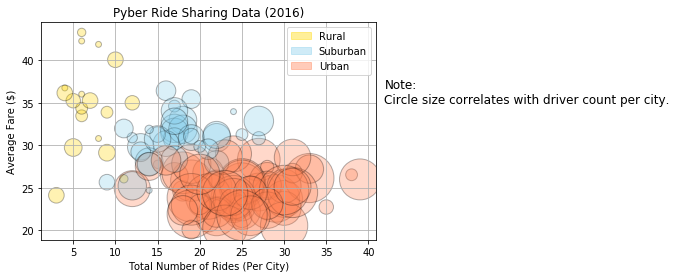

In [19]:
# Build the scatter plots for each city types
plt.grid(True)
# calls columns from bubble_df
plt.scatter(x=bubble_df['TotalRides'],
            y=bubble_df['AvgFare'],
            s=bubble_df['DriverCt']*35,
            alpha = 0.3,
            c=bubble_df['typecolor'],
            linewidth=1, edgecolor = "black")
 
# chart title, axis labels
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.text(0.92, .65, "Note:", fontsize=12, transform=plt.gcf().transFigure)
plt.text(0.92, .60, "Circle size correlates with driver count per city.", fontsize=12, transform=plt.gcf().transFigure)

# legend fields set to values from pie_df
type_list = list(pie_df['label'])
color_list = list(pie_df['type_color'])
#cpat = Line2D([0], [0], marker='o',color='w')
#circle = plt.Circle((1,2), radius = 1)
#    appe_list.append(plt.plot([],[], marker = "o", ms=10, ls=""),
appe_list = []

#set legend label and color by for loop
for i in range(0,len(pie_df.index)):
#    appe_list.append(plt.plot([0],[0], marker ="o", ms=10, ls="", color=color_list[i], alpha=0.4, label = type_list[i]))
     appe_list.append(mpatch.Patch(color = color_list[i], alpha=0.4, label = type_list[i]))
plt.legend(handles = appe_list, loc= "best")
plt.savefig("Pyber Ride Sharing Data (2016).png")
#plt.legend2(handles = appe_list, numpoints =1, loc= [1.05, 0]
#plt.legend("Note: Circle size correlates with driver count per city.", loc = (1.05, 0))


In [20]:
## Total Fares by City Type

In [21]:
# Total Fares by City Type - Pie Chart
labels = pie_df['label']
sizes = pie_df['fare_sum']
colors = pie_df['type_color']
explode = (0,0, .1)

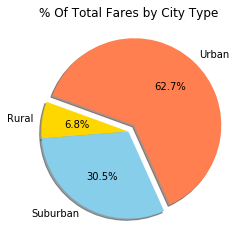

In [22]:
# Show Figure
plt.axes().set_aspect(300)
plt.title("% Of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.savefig("Total Fares by City Type.png") 

In [23]:
def pie_3D():
    chart = PieChart3D(250, 250)
    chart.pie_df['fare_sum']
    chart.pie_df['label']
    chart.pie_df['type_color']
plt.chart
    

AttributeError: module 'matplotlib.pyplot' has no attribute 'chart'

In [ ]:
#% format
#pd.options.display.float_format = '{:,.2%}'.format

## Total Rides by City Type

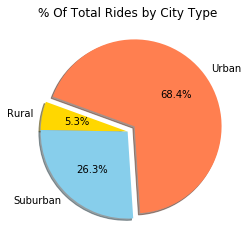

In [24]:
# Calculate Ride Percents
        # from Pie Chart Data Main DataFrame
# Total Fares by City Type - Pie Chart
labels = pie_df['label']
sizes = pie_df['type_ct']
colors = pie_df['type_color']
explode = (0,0, .1)

# Build Pie Chart
# Show Figure
plt.axes().set_aspect(300)
plt.title("% Of Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
# Save Figure
plt.savefig("Total Rides by City Type.png") 

## Total Drivers by City Type

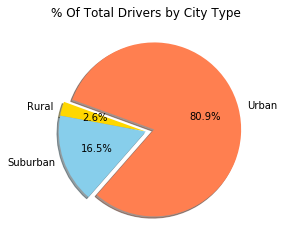

In [25]:
# Calculate Ride Percents
        # from Pie Chart Data Main DataFrame
# Total Fares by City Type - Pie Chart
labels = pie_df['label']
sizes = pie_df['driver_ct2']
colors = pie_df['type_color']
explode = (0,0, .1)

# Build Pie Chart
# Show Figure
plt.axes().set_aspect(300)
plt.title("% Of Total Drivers by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
# Save Figure
plt.savefig("Total Drivers by City Type.png") 